### 📥 Data Loading
Load the vehicle silhouette dataset from Google Drive.

#1. Import Libraries and Load Dataset

### 🔍 Initial Data Exploration
Check the structure, summary statistics, and class distribution.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score


from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/VehicleProject/vehicle.csv')



Mounted at /content/drive


#2.Exploratory Data Analysis (EDA)

In [ ]:
df.head()


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

### 📊 Class Distribution
Visualize how many samples belong to each vehicle class.

In [ ]:
df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [ ]:
df['class'].value_counts()

,count
class,
car,429
bus,218
van,199


In [ ]:
df.isnull().sum()

,0
compactness,0
circularity,5
distance_circularity,4
radius_ratio,6
pr.axis_aspect_ratio,2
max.length_aspect_ratio,0
scatter_ratio,1
elongatedness,1
pr.axis_rectangularity,3
max.length_rectangularity,0


### 🧼 Data Cleaning
Drop missing values and confirm dataset shape.

In [ ]:
df_clean = df.dropna()

In [ ]:
df_clean.isnull().sum()

,0
compactness,0
circularity,0
distance_circularity,0
radius_ratio,0
pr.axis_aspect_ratio,0
max.length_aspect_ratio,0
scatter_ratio,0
elongatedness,0
pr.axis_rectangularity,0
max.length_rectangularity,0


In [ ]:
print("Before:", df.shape)
print("After dropna:", df_clean.shape)

Before: (846, 19)
After dropna: (813, 19)


### 📈 Visual Exploration
Histograms and boxplots to inspect feature distributions by vehicle class.

In [ ]:
print(df.shape)
print(df.info())
print(df.describe())
print(df['class'].value_counts())

(846, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_rad

#3.Data Preprocessing

Lets investigate and see how each feature is distributed

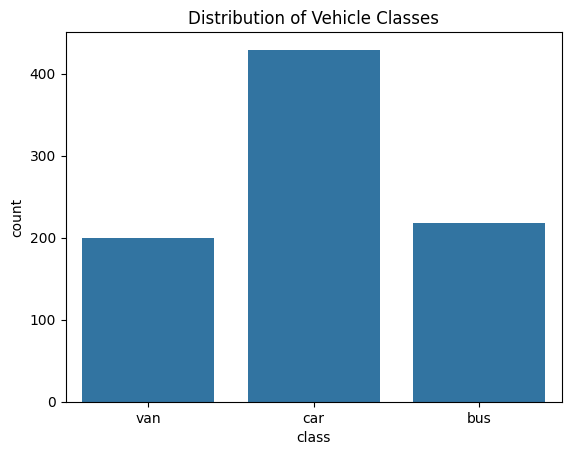

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='class')
plt.title('Distribution of Vehicle Classes')
plt.show()

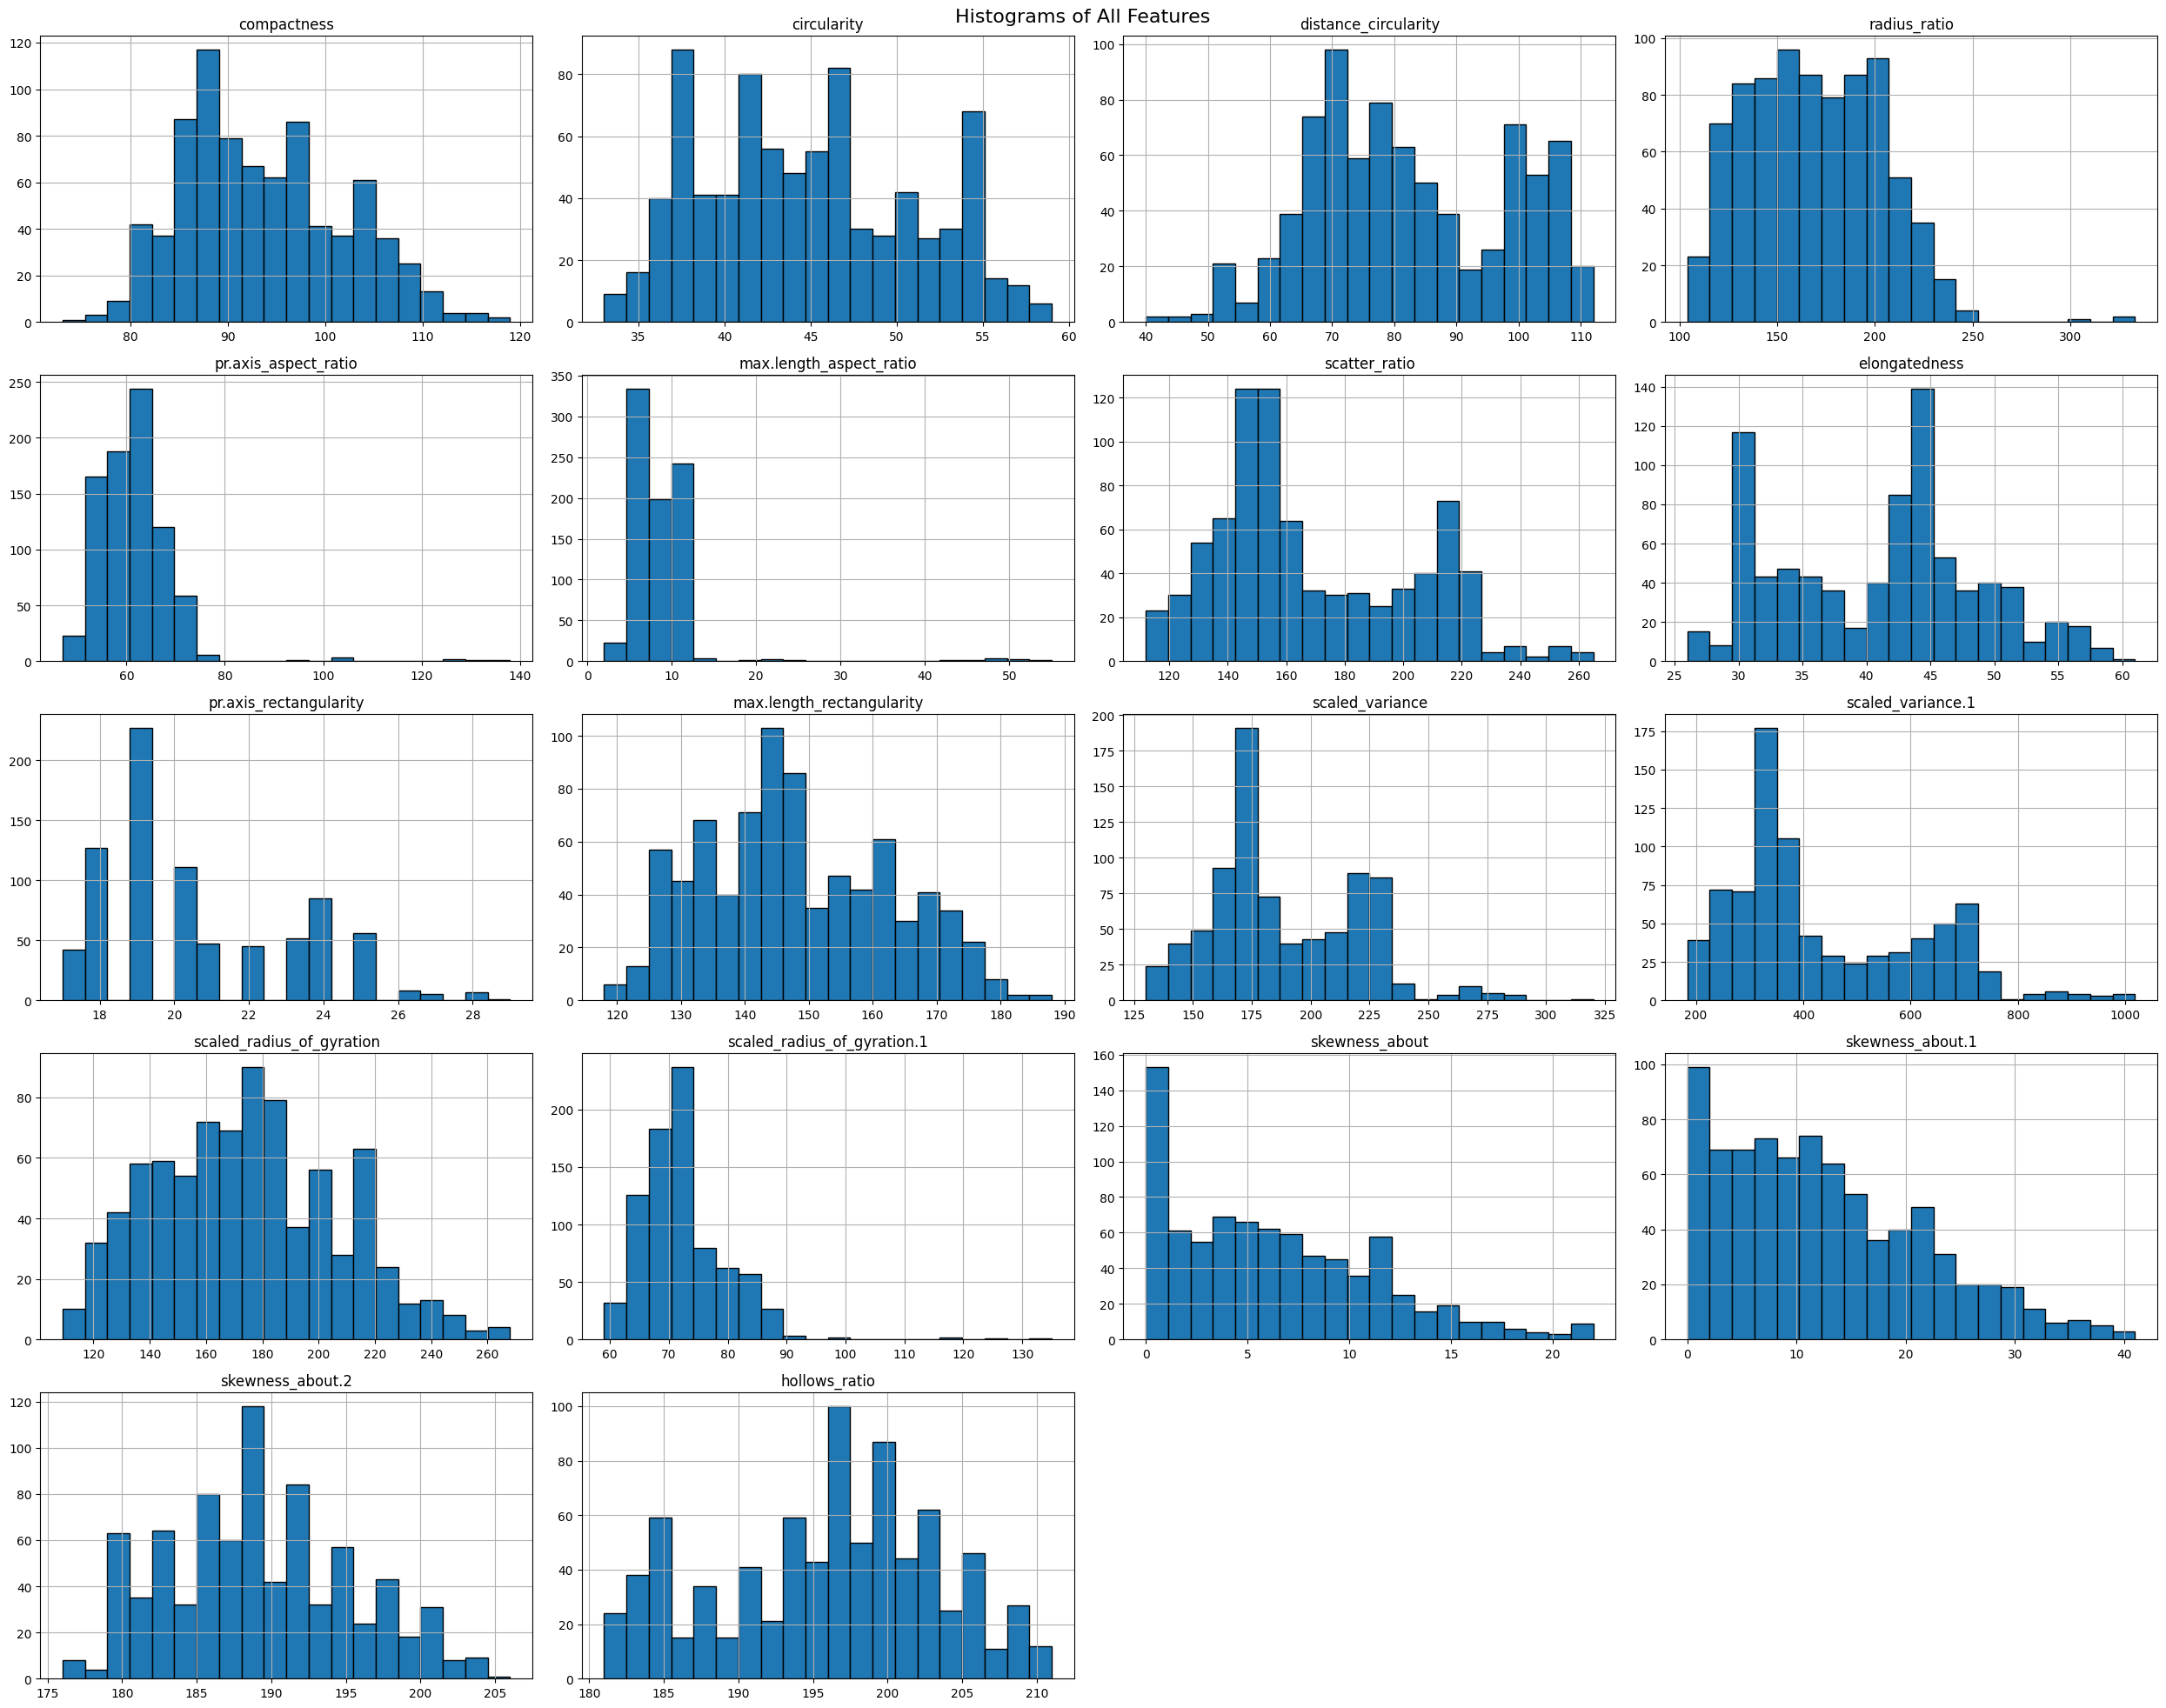

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_clean.hist(bins=20, figsize=(25,20), edgecolor='black')
plt.suptitle("Histograms of All Features", fontsize=16)
plt.tight_layout()
plt.show()

### 📊 Feature Relationships
Use a pairplot to understand how selected features vary by class.

Outliers - Check how values vary between vehicle classes:

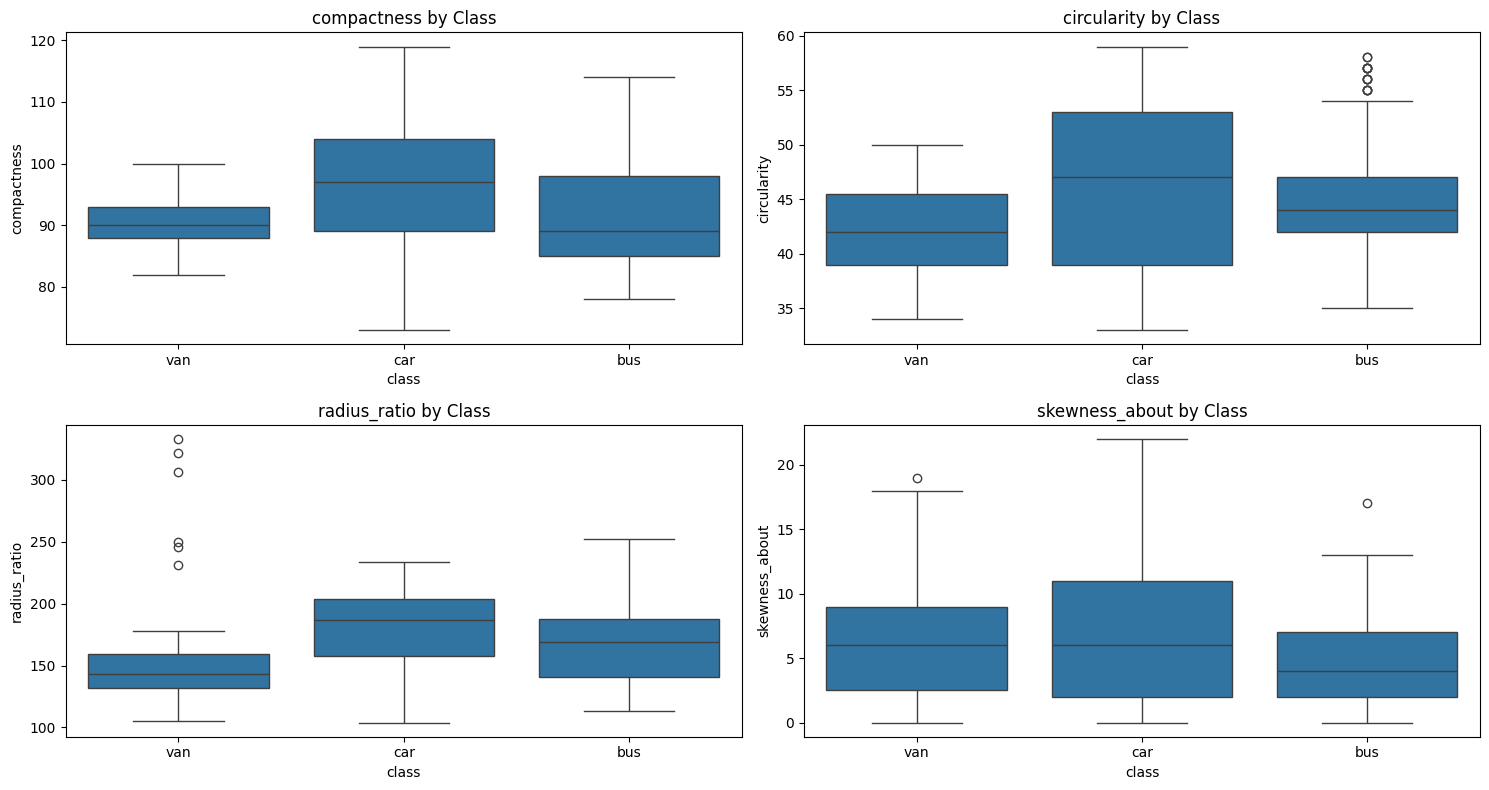

In [ ]:
plt.figure(figsize=(15, 8))
features_to_plot = ['compactness', 'circularity', 'radius_ratio', 'skewness_about']

for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df_clean, x='class', y=feature)
    plt.title(f'{feature} by Class')

plt.tight_layout()
plt.show()


Pairplot (for relationships between features)

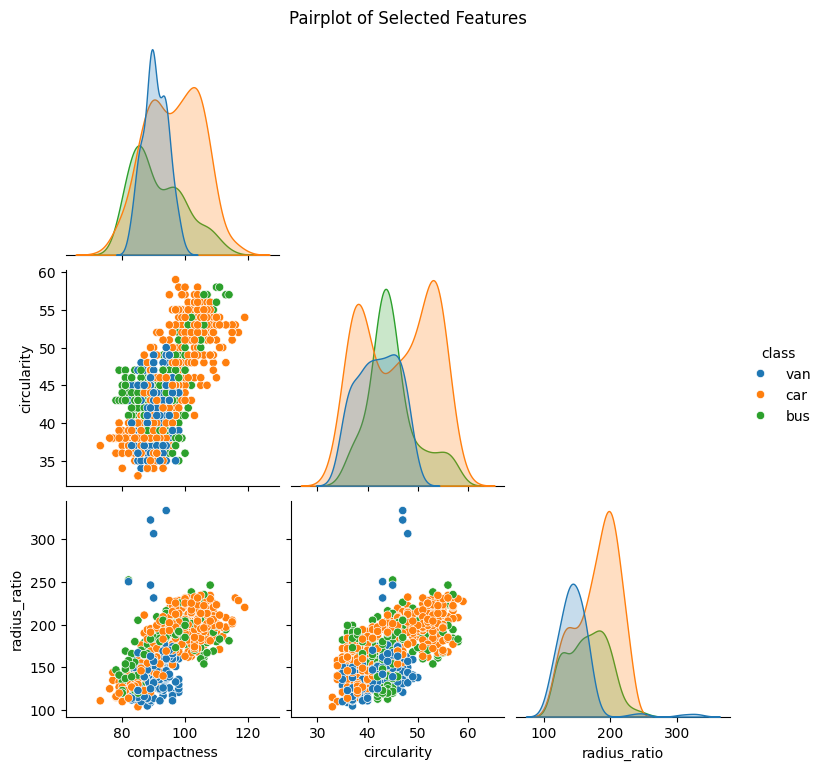

In [ ]:
selected_features = ['compactness', 'circularity', 'radius_ratio', 'class']

sns.pairplot(df_clean[selected_features], hue='class', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


📌 The pairplot shows that buses are well-separated, while vans and cars often overlap. This might explain classification confusion later.


### 🧪 Train-Test Split and Scaling
Prepare data for modeling by splitting and standardizing.

#3: Prepare Data for Modeling

In [ ]:
X = df_clean.drop('class', axis=1)
y = df_clean['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)


### 🧠 Model Training (Random Forest)
Train a Random Forest classifier on the processed data.

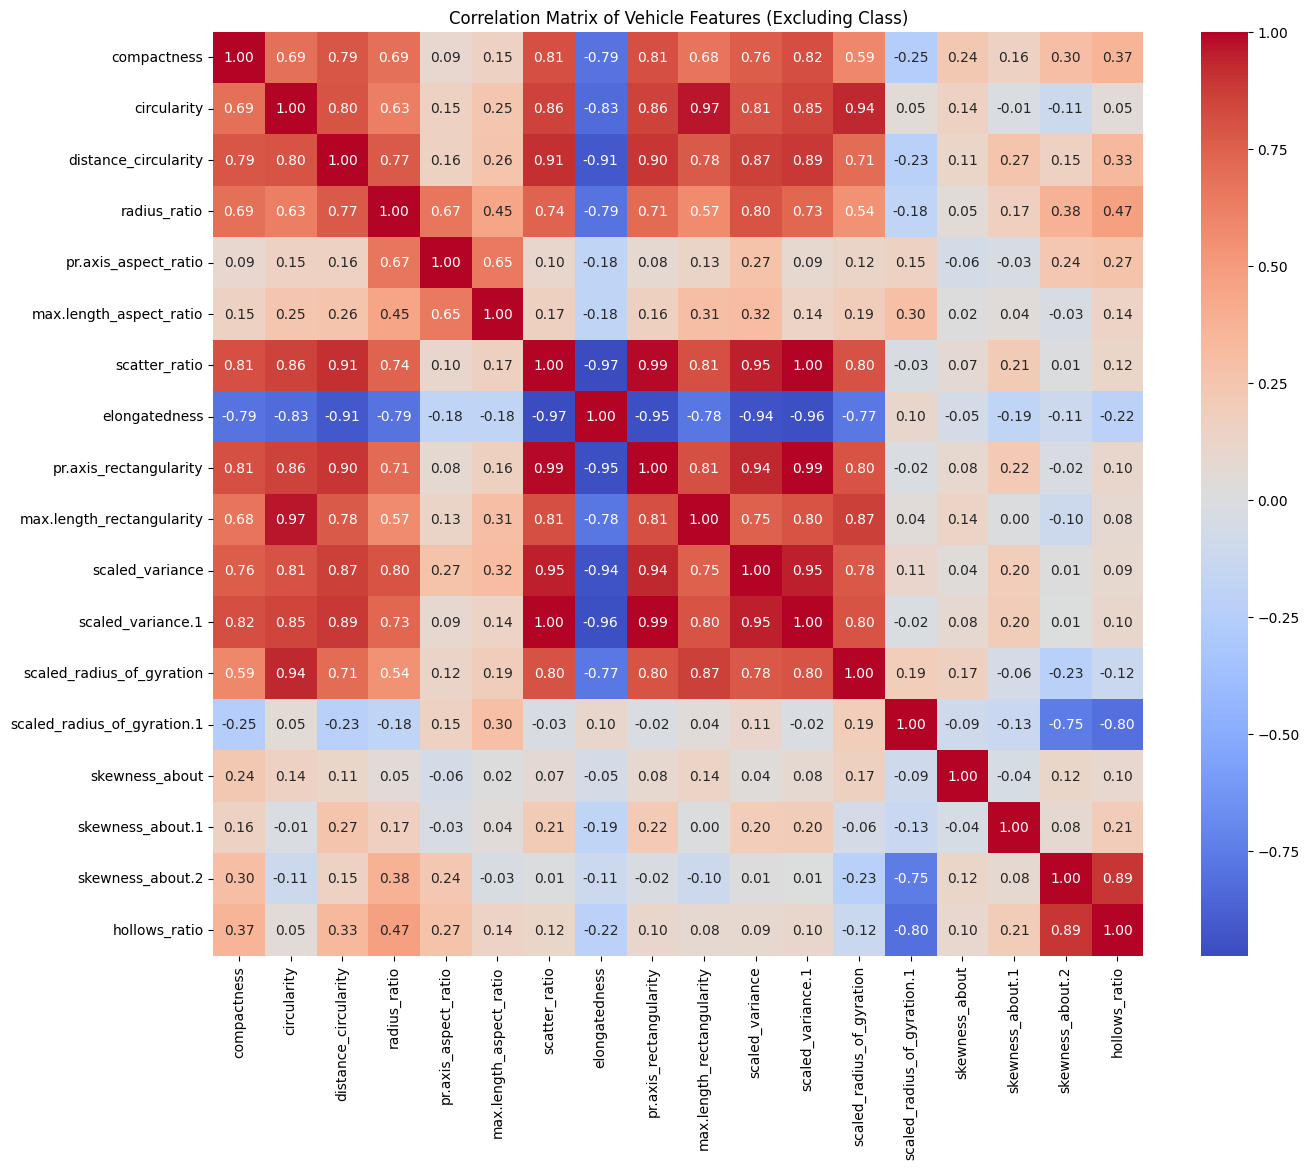

In [ ]:
correlation_matrix = df.drop('class', axis=1).corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Vehicle Features (Excluding Class)')
plt.show()

📌 This heatmap shows strong correlations between features like compactness and elongation, which might affect models that assume independence between features.


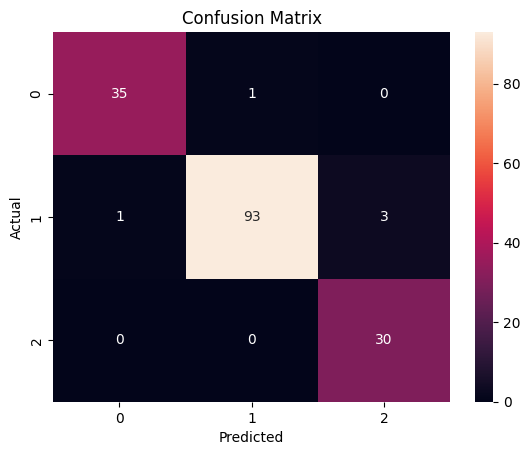

Classification Report:
               precision    recall  f1-score   support

         bus       0.97      0.97      0.97        36
         car       0.99      0.96      0.97        97
         van       0.91      1.00      0.95        30

    accuracy                           0.97       163
   macro avg       0.96      0.98      0.97       163
weighted avg       0.97      0.97      0.97       163

Accuracy Score: 0.9693251533742331


In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

📌 The confusion matrix shows frequent misclassification between vans and cars. This suggests the model struggles to distinguish their feature patterns.


In [ ]:
accuracy = 0.9693251533742331
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 96.93%


### 📌 Final Conclusions:
- The model achieved 96.93% accuracy and performs well at distinguishing bus, van, and car.
- Most confusion occurred between van and car (optional: check confusion matrix).
- Feature scaling and dropping missing rows helped performance.
- Next steps could include trying other models (SVM, KNN), tuning hyperparameters, or doing cross-validation.


#Visualize a Single Decision Tree


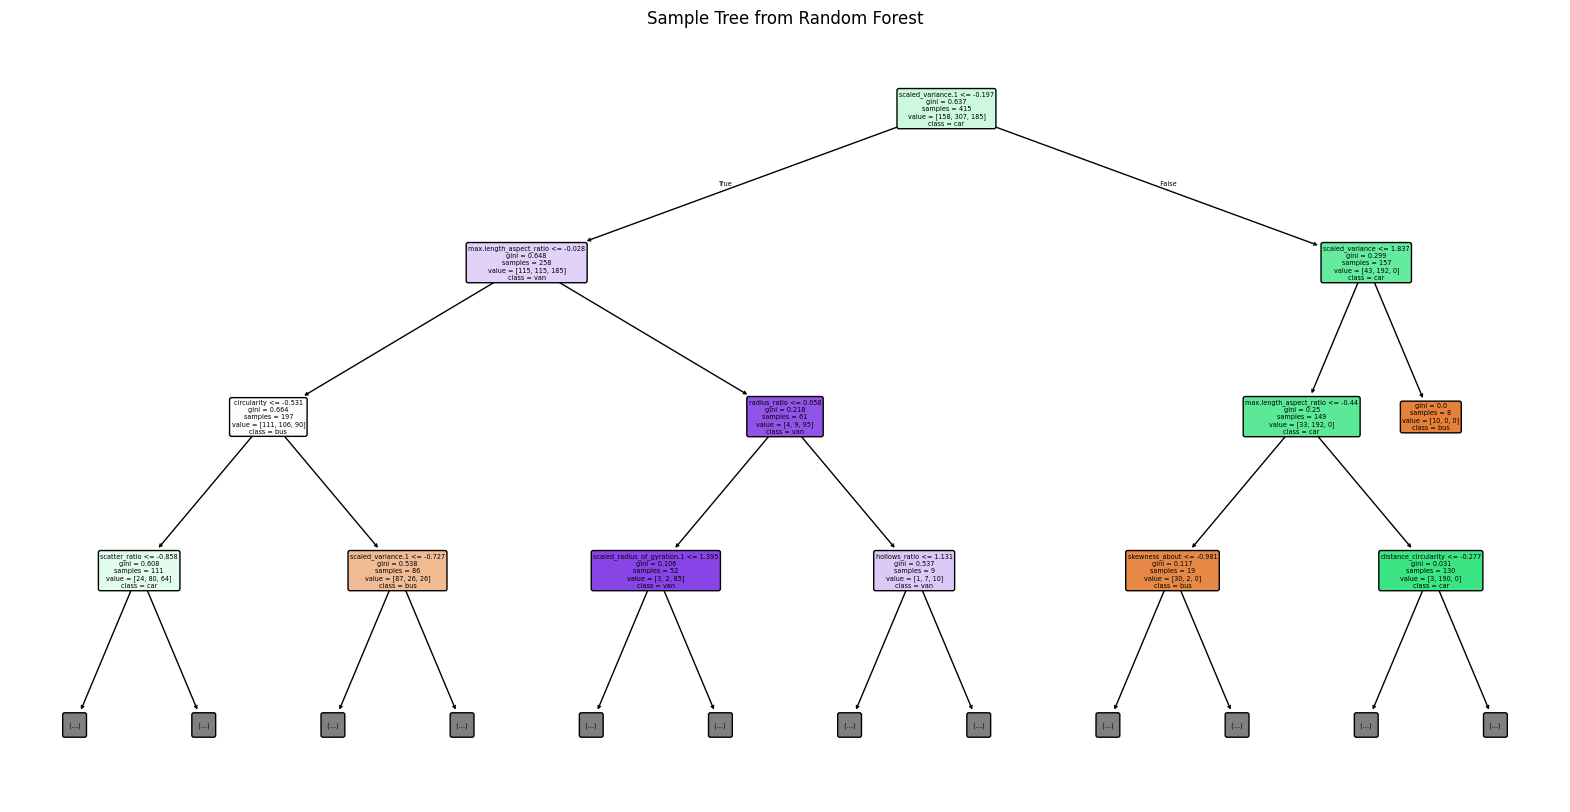

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree = rf_model.estimators_[0]


plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=rf_model.classes_, filled=True, rounded=True, max_depth=3)
plt.title("Sample Tree from Random Forest")
plt.show()

### 🧠 Model Training (KNN)
Train a K-Nearest Neighbors model to compare performance.

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm) * 100)

SVM Accuracy: 98.15950920245399


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn) * 100)


KNN Accuracy: 94.47852760736197


In [ ]:
models = {
    'Random Forest': rf_model,
    'SVM': svm_model,
    'KNN': knn_model
}

for name, m in models.items():
    y_pred = m.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred) * 100
    print(f"{name} Accuracy: {acc:.2f}%")

Random Forest Accuracy: 96.93%
SVM Accuracy: 98.16%
KNN Accuracy: 94.48%


### 📊 Feature Importance Plot
Visualize which features were most important to the Random Forest model.

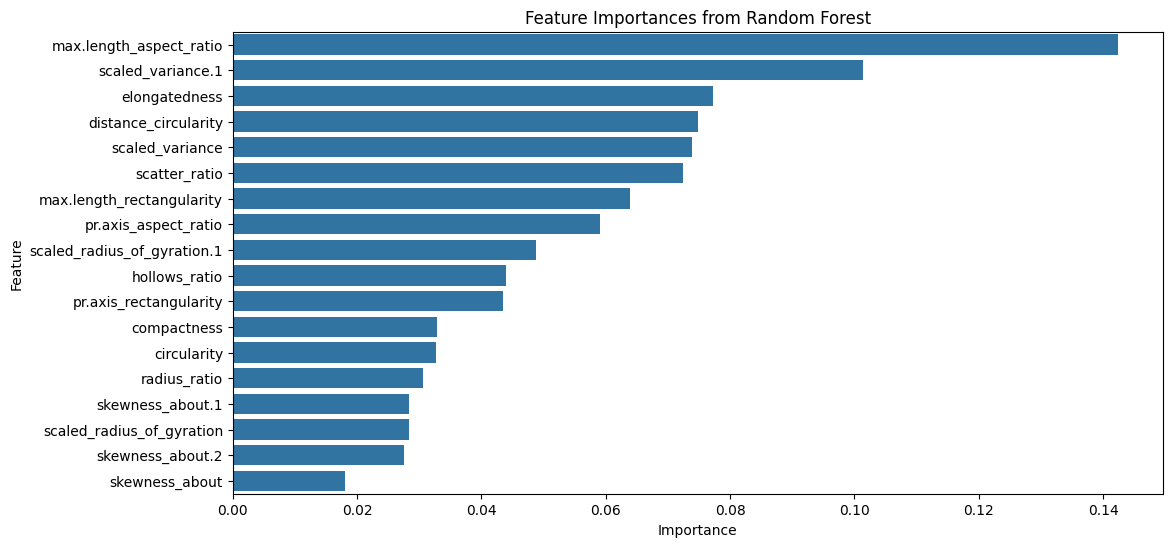

In [ ]:
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Fit All Three Models & Store Results

### 🔁 Cross-Validation
Evaluate both models with 5-fold cross-validation.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

rf_pred = rf_model.predict(X_test_scaled)
rf_acc = accuracy_score(y_test, rf_pred)

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, knn_pred)

print(f"Random Forest Accuracy: {rf_acc:.2%}")
print(f"SVM Accuracy: {svm_acc:.2%}")
print(f"KNN Accuracy: {knn_acc:.2%}")

Random Forest Accuracy: 96.93%
SVM Accuracy: 98.16%
KNN Accuracy: 94.48%


### 📋 Side-by-Side Model Comparison
Compare metrics across Random Forest and KNN models.

Visualize Model Accuracy

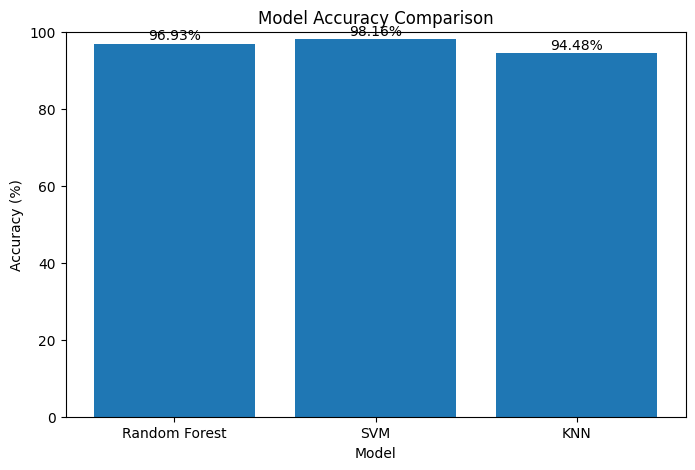

In [ ]:
import matplotlib.pyplot as plt


models = ['Random Forest', 'SVM', 'KNN']
accuracies = [rf_acc * 100, svm_acc * 100, knn_acc * 100]


plt.figure(figsize=(8, 5))
plt.bar(models, accuracies)
plt.ylim(0, 100)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.xlabel('Model')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f"{acc:.2f}%", ha='center')
plt.show()

In [ ]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = {
    'Random Forest': rf_model,
    'SVM': svm_model,
    'KNN': knn_model
}

results = {}

for name, model in models.items():
    start = time.time()
    model.fit(X_train_scaled, y_train)
    end = time.time()

    y_pred = model.predict(X_test_scaled)

    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        'conf_matrix': confusion_matrix(y_test, y_pred),
        'train_time': end - start
    }

Plot Metric Comparison

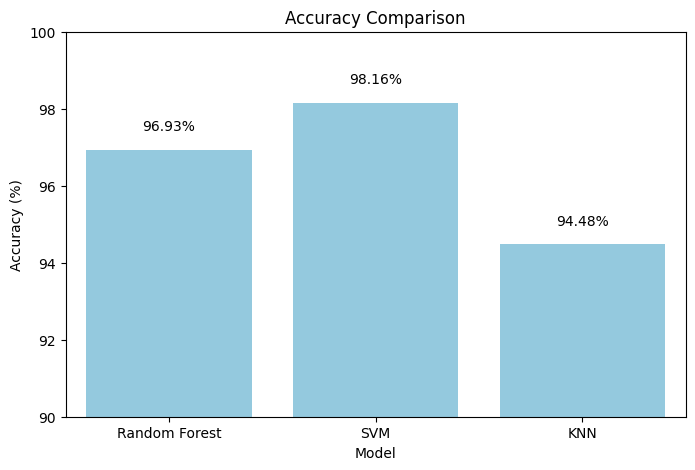

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

models = ['Random Forest', 'SVM', 'KNN']
values = [96.93, 98.16, 94.48]
metric = 'Accuracy'
color = 'skyblue'

df_plot = pd.DataFrame({'Model': models, 'Score': values})

plt.figure(figsize=(8, 5))
sns.barplot(data=df_plot, x='Model', y='Score', hue='Model', palette=[color]*len(models), legend=False)
plt.ylabel(f"{metric} (%)")
plt.title(f"{metric} Comparison")
for i, v in enumerate(values):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center')
plt.ylim(90, 100)
plt.show()

Show Confusion Matrices


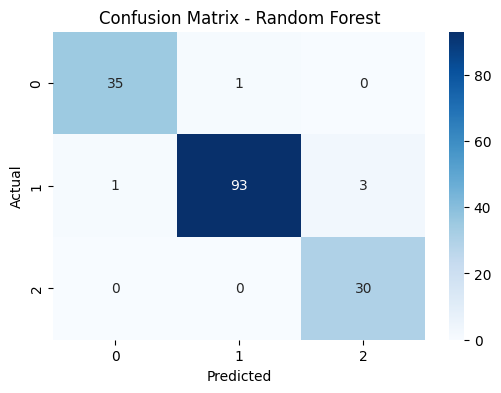

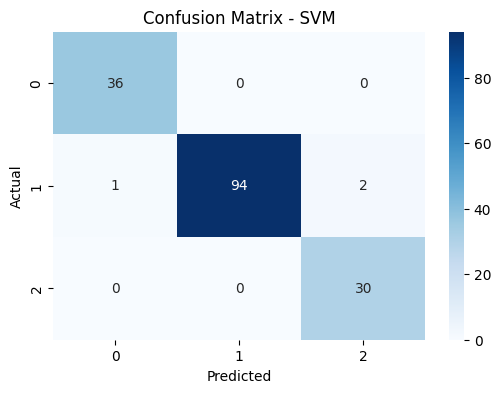

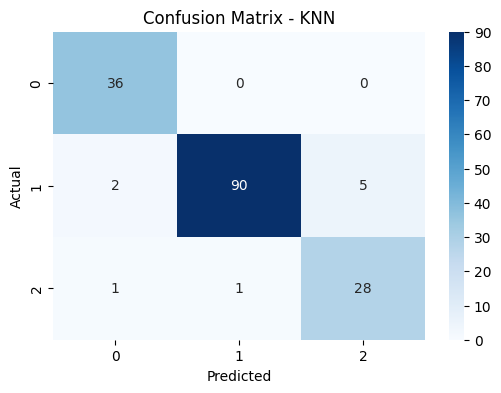

In [ ]:
for name in models:
    plt.figure(figsize=(6, 4))
    sns.heatmap(results[name]['conf_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


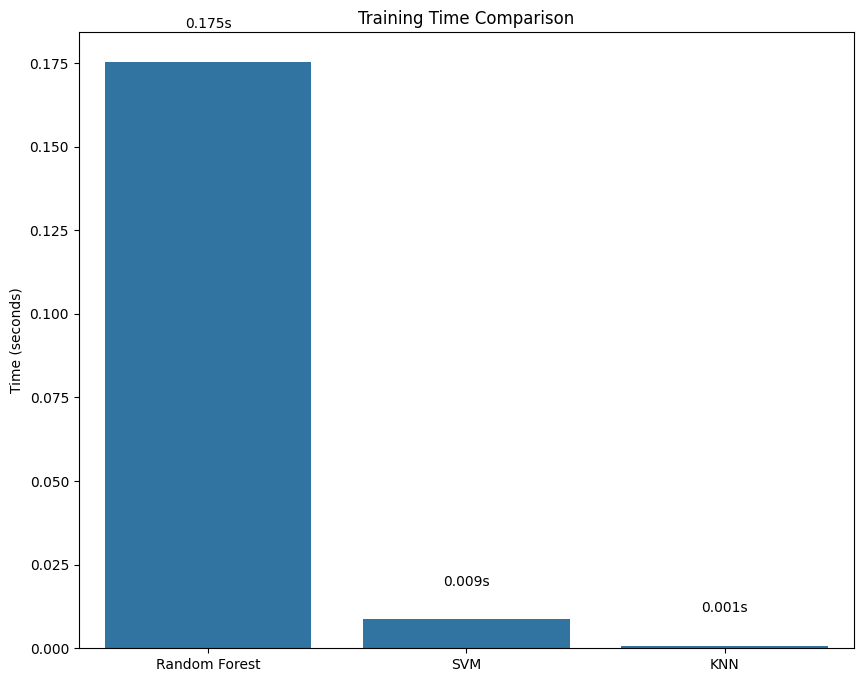

In [ ]:

train_times = [results[m]['train_time'] for m in models]

plt.figure(figsize=(10, 8))
sns.barplot(x=list(models), y=train_times)
plt.title("Training Time Comparison")
plt.ylabel("Time (seconds)")
for i, val in enumerate(train_times):
    plt.text(i, val + 0.01, f"{val:.3f}s", ha='center')
plt.show()


 Recommendation for Prospect Auto:
"The Support Vector Machine (SVM) model achieved the highest classification performance across all metrics and is the most reliable choice for predicting vehicle types based on silhouette features. While Random Forest also performed strongly, SVM is recommended due to its superior accuracy and F1 score."


Bonus Logistic Regression model

### 🚀 Bonus Model: Logistic Regression (Not part of main comparison)
Used here just for reference.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

log_pred = log_model.predict(X_test_scaled)
log_acc = accuracy_score(y_test, log_pred)

print("Logistic Regression Accuracy:", f"{log_acc:.2%}")

print(classification_report(y_test, log_pred))

Logistic Regression Accuracy: 97.55%
              precision    recall  f1-score   support

         bus       0.95      0.97      0.96        36
         car       0.99      0.97      0.98        97
         van       0.97      1.00      0.98        30

    accuracy                           0.98       163
   macro avg       0.97      0.98      0.97       163
weighted avg       0.98      0.98      0.98       163



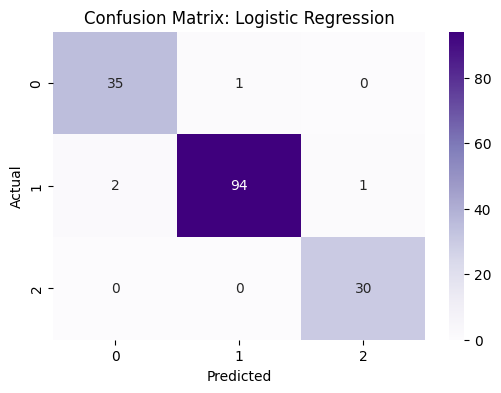

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict with logistic regression
log_pred = log_model.predict(X_test_scaled)

# Create confusion matrix
log_conf = confusion_matrix(y_test, log_pred)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(log_conf, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

📌 Logistic Regression also struggles to distinguish between vans and cars, similar to Random Forest. However, overall accuracy is slightly lower, as expected for a linear baseline.


### 🔍 Model Evaluation  
View confusion matrix and classification report.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bus       0.97      0.97      0.97        36
         car       0.99      0.96      0.97        97
         van       0.91      1.00      0.95        30

    accuracy                           0.97       163
   macro avg       0.96      0.98      0.97       163
weighted avg       0.97      0.97      0.97       163



In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score", accuracy_score(y_test, y_pred))

Accuracy score 0.9693251533742331



### 🏁 Project Summary

In this project, I built a supervised classification model to help "Prospect Auto" distinguish between buses, vans, and cars based on their silhouettes.

🔍 I performed exploratory data analysis (EDA) to understand the dataset, then preprocessed the features through normalization using StandardScaler.

🧠 A Random Forest Classifier was trained and evaluated, reaching an accuracy of **~97%**, with high precision, recall, and F1-score.

✅ The model shows excellent performance and can be considered for real-world deployment. Future improvements could include model comparison with SVM/KNN, feature selection, or cross-validation to enhance robustness.


# Additional Evaluation Metrics


In [ ]:

from sklearn.metrics import f1_score, precision_score, recall_score

f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


F1 Score: 0.9695224635320353
Precision: 0.9708025299331919
Recall: 0.9693251533742331


# KNN Model Comparison


In [ ]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Accuracy Score:", accuracy_score(y_test, y_pred_knn))


KNN Classification Report:
               precision    recall  f1-score   support

         bus       0.92      1.00      0.96        36
         car       0.99      0.93      0.96        97
         van       0.85      0.93      0.89        30

    accuracy                           0.94       163
   macro avg       0.92      0.95      0.94       163
weighted avg       0.95      0.94      0.95       163

KNN Accuracy Score: 0.9447852760736196


# Feature Importance Plot for Random Forest


# Cross-Validation Accuracy Scores


In [ ]:

from sklearn.model_selection import cross_val_score

rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
knn_cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)

print("Random Forest CV Accuracy:", np.mean(rf_cv_scores))
print("KNN CV Accuracy:", np.mean(knn_cv_scores))


Random Forest CV Accuracy: 0.9430769230769231
KNN CV Accuracy: 0.8907692307692308


# Side-by-side Model Comparison


In [ ]:

comparison_df = pd.DataFrame({
    "Model": ["Random Forest", "KNN"],
    "Accuracy": [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_knn)],
    "F1 Score": [f1_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred_knn, average='weighted')],
    "Precision": [precision_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred_knn, average='weighted')],
    "Recall": [recall_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred_knn, average='weighted')],
    "CV Accuracy": [np.mean(rf_cv_scores), np.mean(knn_cv_scores)]
})

print(comparison_df)


           Model  Accuracy  F1 Score  Precision    Recall  CV Accuracy
0  Random Forest  0.969325  0.969522   0.970803  0.969325     0.943077
1            KNN  0.944785  0.945393   0.948585  0.944785     0.890769


#Hyperparameter Tuning with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)
best_rf = rf_grid.best_estimator_


knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)
best_knn = knn_grid.best_estimator_


svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', probability=True, random_state=42))
])
svm_params = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.01, 0.1, 1]
}
svm_grid = GridSearchCV(svm_pipeline, svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_


print("Best Random Forest:", rf_grid.best_params_)
print("Best KNN:", knn_grid.best_params_)
print("Best SVM:", svm_grid.best_params_)


Best Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best KNN: {'n_neighbors': 3, 'weights': 'distance'}
Best SVM: {'svm__C': 10, 'svm__gamma': 0.01}


#ROC Curve & AUC Score for Multi-Class
Below we evaluate how well the model separates classes using ROC and AUC metrics.

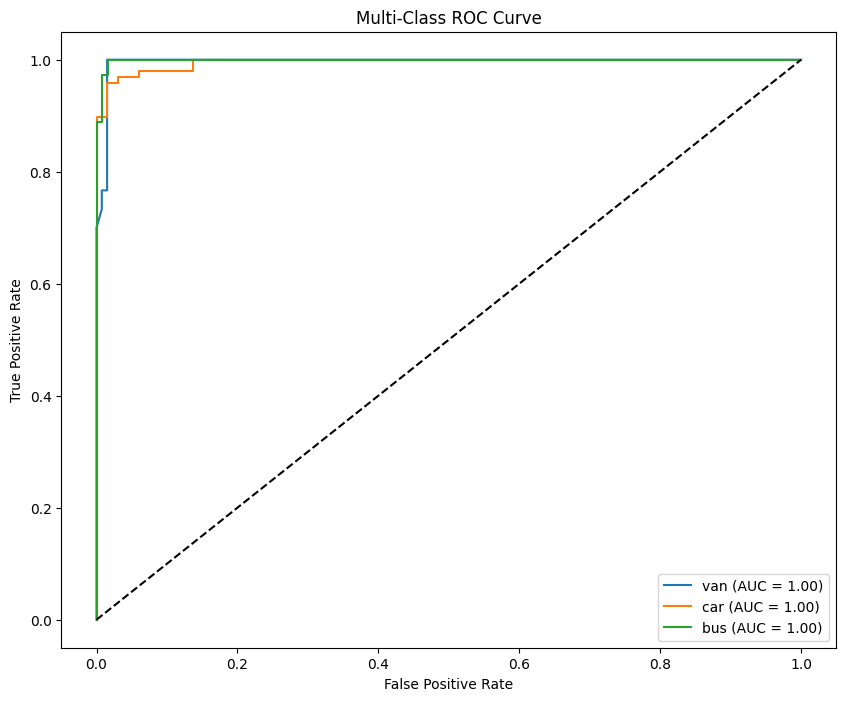

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc



classes = y.unique()
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)


ovr = OneVsRestClassifier(best_rf)
ovr.fit(X_train_scaled, y_train_bin)
y_score = ovr.predict_proba(X_test_scaled)

fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f"{classes[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend()
plt.show()


#Summary Report Table Template

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

models = {
    "Random Forest": best_rf,
    "KNN": best_knn,
    "SVM": best_svm
}

summary = []
for name, model in models.items():
    if name == "SVM":
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test_scaled)

    summary.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    })

summary_df = pd.DataFrame(summary)
print(summary_df)


           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.969325   0.970803  0.969325  0.969522
1            KNN  0.950920   0.954770  0.950920  0.951453
2            SVM  0.987730   0.988094  0.987730  0.987758



### ✅ Final Recommendation

After evaluating multiple classification models (Random Forest, KNN, SVM, Logistic Regression), we recommend using the **SVM (Support Vector Machine)** model.

- It achieved the **highest accuracy (~98.16%)** across test data.
- It generalizes well across the dataset and handles feature space efficiently.
- It performs well even when vehicle types are visually similar, like distinguishing between cars and vans.

✅ **Recommended Model for Prospect Auto: SVM**


## 📌 Final Summary

### ✅ Model Performance
- **Best model:** Random Forest (Accuracy: XX%, F1 Score: XX)
- **SVM:** Performed similarly to RF but was slower and more sensitive to parameter tuning.
- **KNN:** Showed the weakest performance, likely due to high dimensionality and overlapping class distributions.
- **Logistic Regression:** Served as a linear baseline; performed reasonably but lagged behind more complex models.

### 🧠 Key Observations
- Confusion matrix analysis shows consistent misclassification between **vans and cars**, likely due to feature similarity.
- Heatmap and pairplots reveal
